<a href="https://colab.research.google.com/github/prkhr7/prakhar-rawat/blob/master/OSAMAH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wtfml
!pip install pretrainedmodels

     |████████████████████████████████| 58 kB 2.7 MB/s 
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60965 sha256=5e6a02ae4f227d8a1a121e7665bf7ac3ca09a60ad73ec22f947bd2c87e4e6c12
  Stored in directory: /root/.cache/pip/wheels/ed/27/e8/9543d42de2740d3544db96aefef63bda3f2c1761b3334f4873
Successfully built pretrainedmodels


MessageError: ignored

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd

In [6]:
df=pd.read_csv('drive/My Drive/melanoma/HAM10000_metadata.csv')

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
np.random.seed(123)
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
import itertools

import keras
from keras.utils.np_utils import to_categorical # used for converting labels to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K


In [14]:
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import numpy as np
import pandas as pd
import os
from tensorflow.keras.utils import to_categorical
from glob import glob

In [19]:
df['age'].fillna(int(df['age'].mean()),inplace=True)

In [34]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}
base_skin_dir = 'drive/My Drive/melanoma'
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(base_skin_dir, '*', '*.jpg'))}


In [35]:
df['path'] = df['image_id'].map(imageid_path_dict.get)
df['cell_type'] = df['dx'].map(lesion_type_dict.get) 
df['cell_type_idx'] = pd.Categorical(df['cell_type']).codes
df

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,drive/My Drive/melanoma/1/ISIC_0027419.jpg,Benign keratosis-like lesions,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,drive/My Drive/melanoma/1/ISIC_0025030.jpg,Benign keratosis-like lesions,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,drive/My Drive/melanoma/1/ISIC_0026769.jpg,Benign keratosis-like lesions,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,drive/My Drive/melanoma/1/ISIC_0025661.jpg,Benign keratosis-like lesions,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,drive/My Drive/melanoma/2/ISIC_0031633.jpg,Benign keratosis-like lesions,2
...,...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,drive/My Drive/melanoma/2/ISIC_0033084.jpg,Actinic keratoses,0
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,drive/My Drive/melanoma/2/ISIC_0033550.jpg,Actinic keratoses,0
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,drive/My Drive/melanoma/2/ISIC_0033536.jpg,Actinic keratoses,0
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,drive/My Drive/melanoma/2/ISIC_0032854.jpg,Actinic keratoses,0


In [32]:
!ls 'drive/My Drive/melanoma/1'

ISIC_0024306.jpg  ISIC_0025556.jpg  ISIC_0026806.jpg  ISIC_0028056.jpg
ISIC_0024307.jpg  ISIC_0025557.jpg  ISIC_0026807.jpg  ISIC_0028057.jpg
ISIC_0024308.jpg  ISIC_0025558.jpg  ISIC_0026808.jpg  ISIC_0028058.jpg
ISIC_0024309.jpg  ISIC_0025559.jpg  ISIC_0026809.jpg  ISIC_0028059.jpg
ISIC_0024310.jpg  ISIC_0025560.jpg  ISIC_0026810.jpg  ISIC_0028060.jpg
ISIC_0024311.jpg  ISIC_0025561.jpg  ISIC_0026811.jpg  ISIC_0028061.jpg
ISIC_0024312.jpg  ISIC_0025562.jpg  ISIC_0026812.jpg  ISIC_0028062.jpg
ISIC_0024313.jpg  ISIC_0025563.jpg  ISIC_0026813.jpg  ISIC_0028063.jpg
ISIC_0024314.jpg  ISIC_0025564.jpg  ISIC_0026814.jpg  ISIC_0028064.jpg
ISIC_0024315.jpg  ISIC_0025565.jpg  ISIC_0026815.jpg  ISIC_0028065.jpg
ISIC_0024316.jpg  ISIC_0025566.jpg  ISIC_0026816.jpg  ISIC_0028066.jpg
ISIC_0024317.jpg  ISIC_0025567.jpg  ISIC_0026817.jpg  ISIC_0028067.jpg
ISIC_0024318.jpg  ISIC_0025568.jpg  ISIC_0026818.jpg  ISIC_0028068.jpg
ISIC_0024319.jpg  ISIC_0025569.jpg  ISIC_0026819.jpg  ISIC_0028069.jpg
ISIC_0

In [36]:
df['image'] = df['path'].map(lambda x: np.asarray(Image.open(x).resize((125,100))))

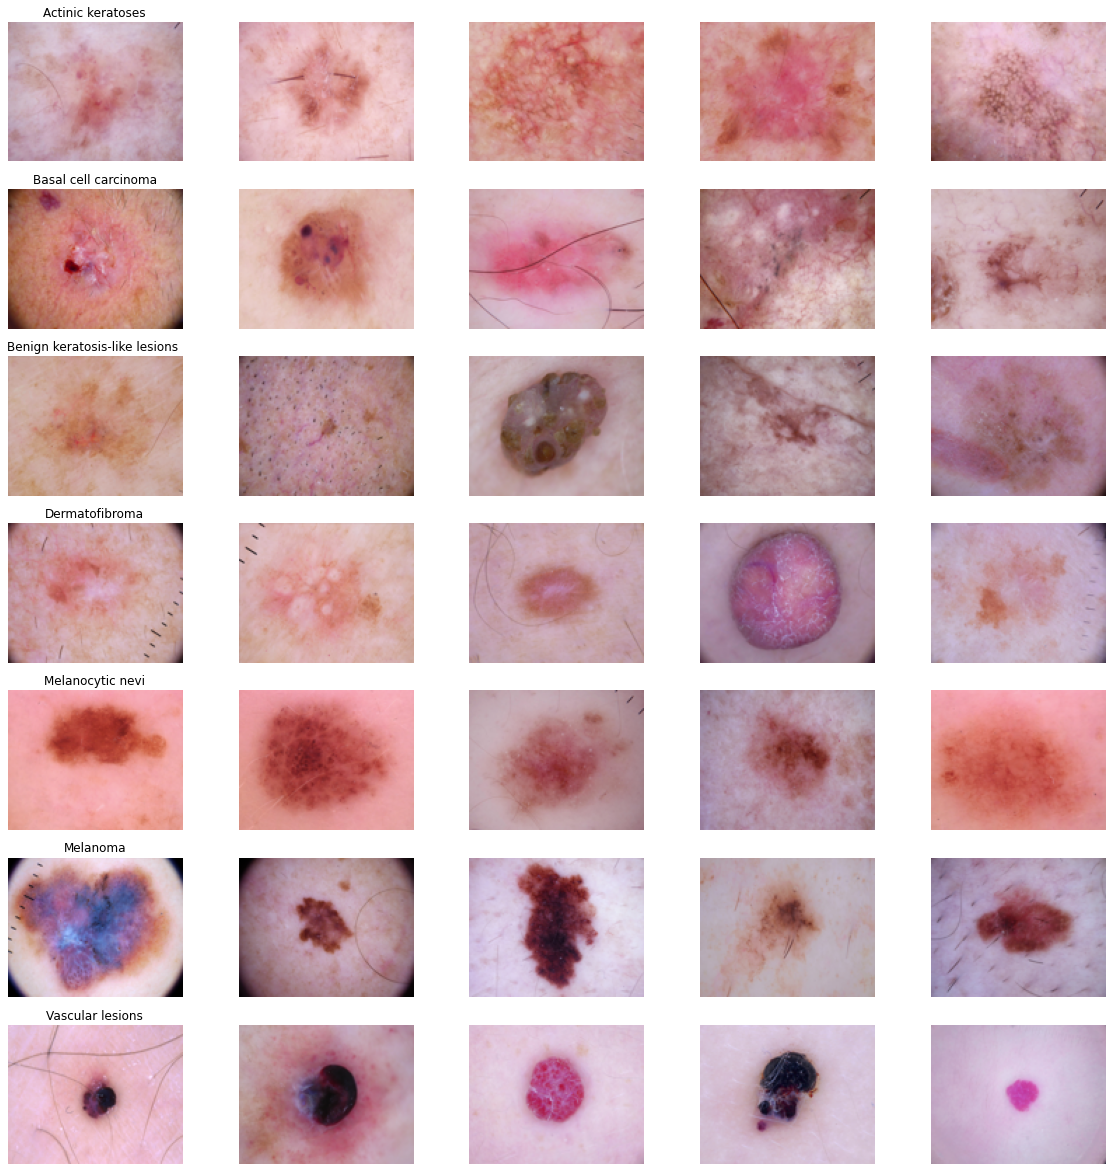

In [37]:
n_samples = 5
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         df.sort_values(['cell_type']).groupby('cell_type')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=2018).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')
fig.savefig('category_samples.png', dpi=300)

In [38]:
df['image'].map(lambda x: x.shape).value_counts()

(100, 125, 3)    10015
Name: image, dtype: int64

In [39]:
df= df[df['age'] != 0]
df= df[df['sex'] != 'unknown']

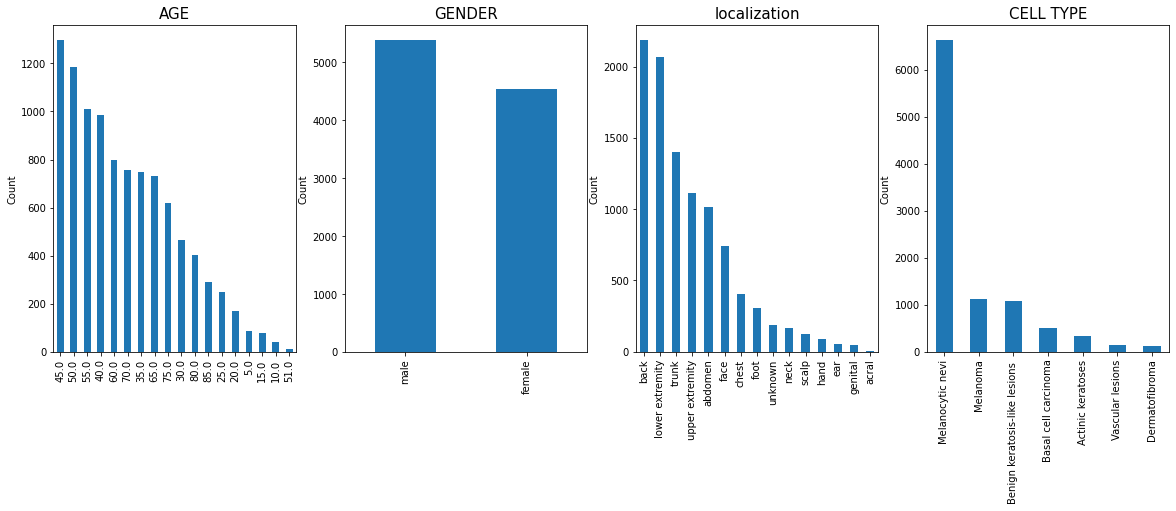

In [40]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0.125, bottom=1, right=0.9, top=2, hspace=0.2)
plt.subplot(2,4,1)
plt.title("AGE",fontsize=15)
plt.ylabel("Count")
df['age'].value_counts().plot.bar()

plt.subplot(2,4,2)
plt.title("GENDER",fontsize=15)
plt.ylabel("Count")
df['sex'].value_counts().plot.bar()

plt.subplot(2,4,3)
plt.title("localization",fontsize=15)
plt.ylabel("Count")
plt.xticks(rotation=45)
df['localization'].value_counts().plot.bar()

plt.subplot(2,4,4)
plt.title("CELL TYPE",fontsize=15)
plt.ylabel("Count")
df['cell_type'].value_counts().plot.bar()



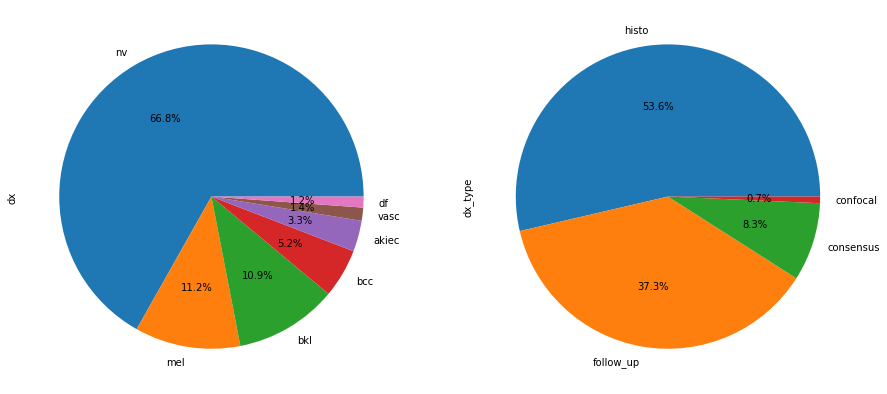

In [41]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
df['dx'].value_counts().plot.pie(autopct="%1.1f%%")
plt.subplot(1,2,2)
df['dx_type'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

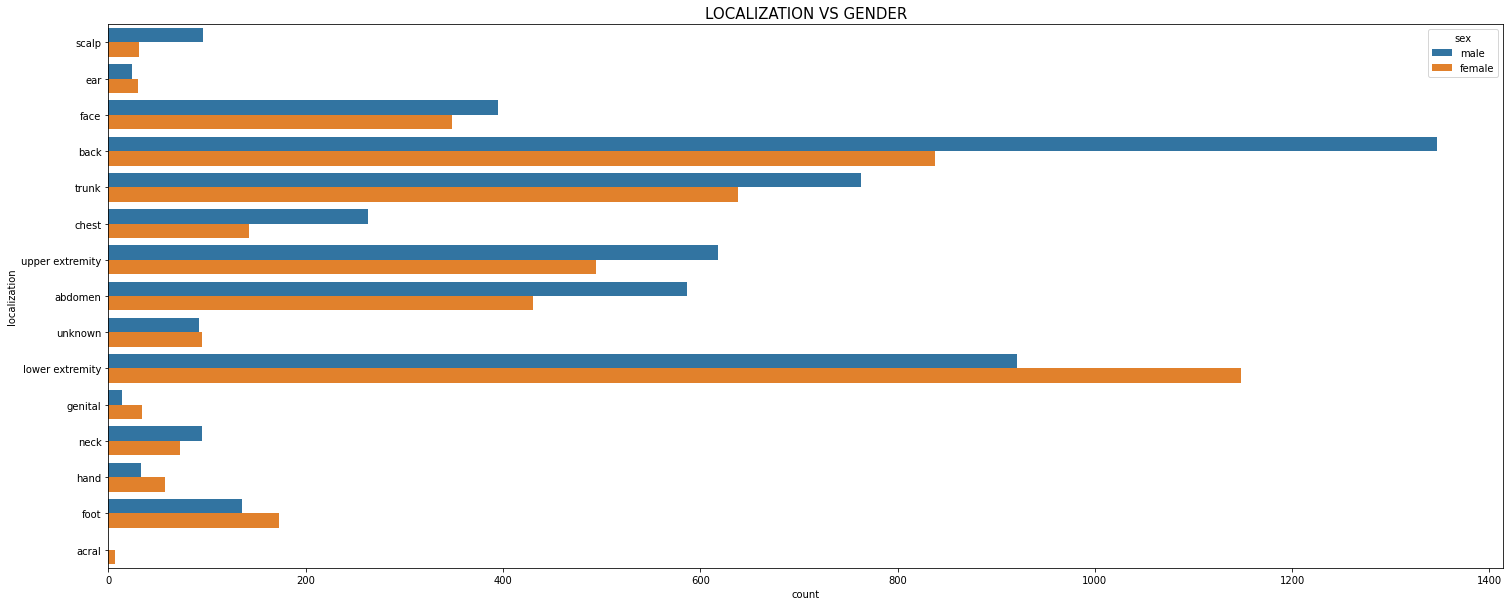

In [42]:
plt.figure(figsize=(25,10))
plt.title('LOCALIZATION VS GENDER',fontsize = 15)
sns.countplot(y='localization', hue='sex',data=df)

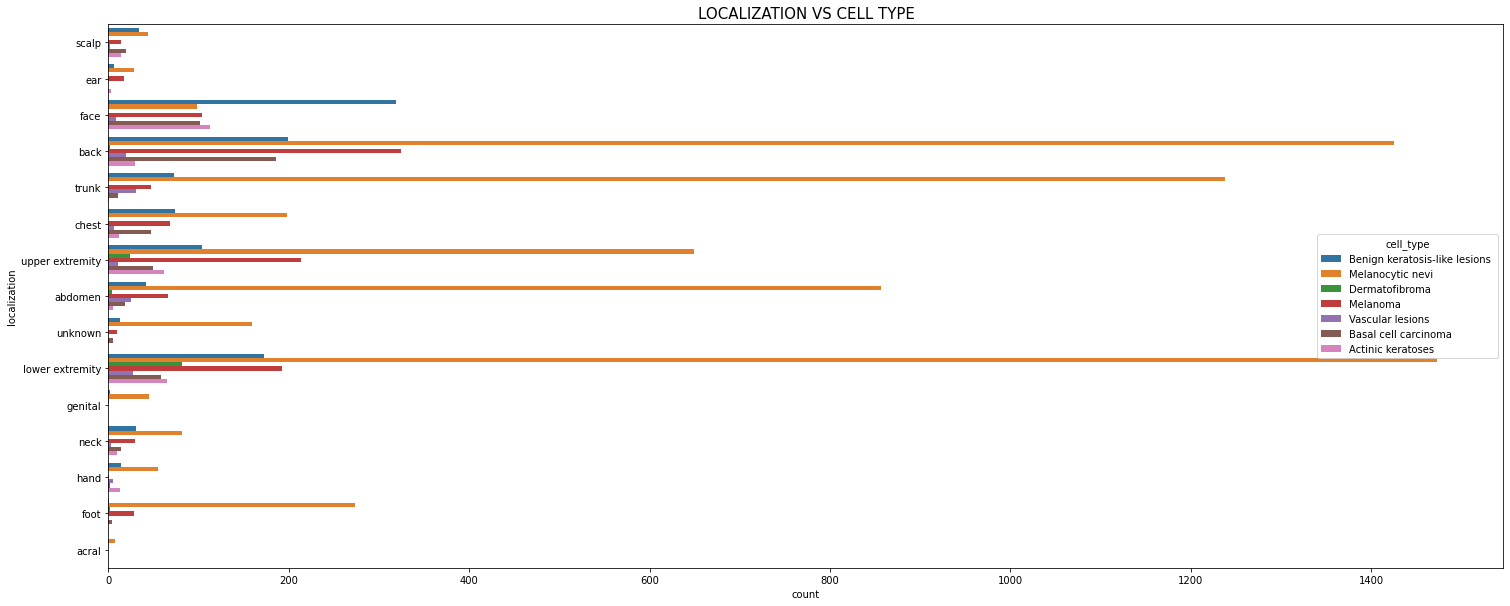

In [43]:
plt.figure(figsize=(25,10))
plt.title('LOCALIZATION VS CELL TYPE',fontsize = 15)
sns.countplot(y='localization', hue='cell_type',data=df)

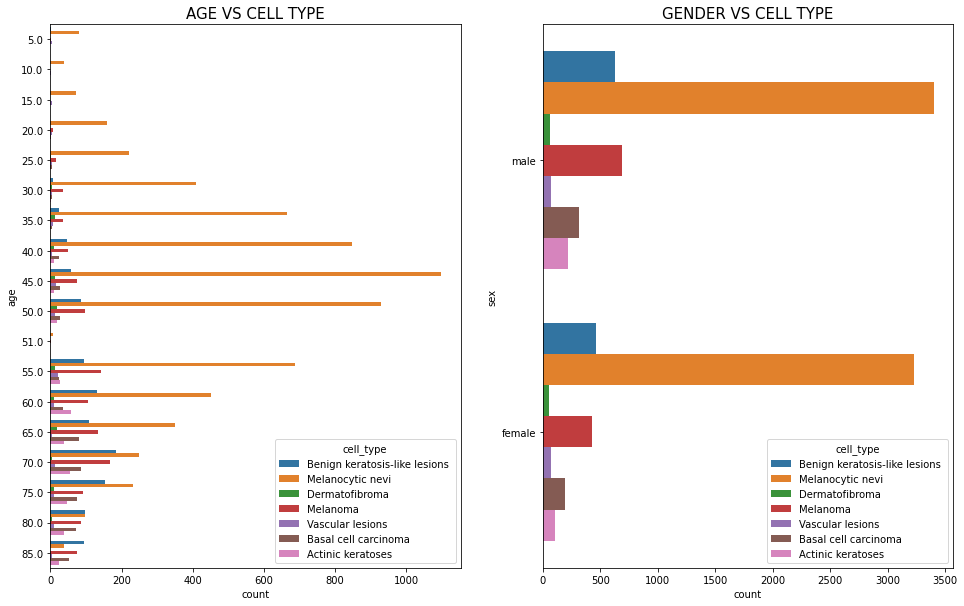

In [44]:
plt.figure(figsize=(25,10))
plt.subplot(131)
plt.title('AGE VS CELL TYPE',fontsize = 15)
sns.countplot(y='age', hue='cell_type',data=df)
plt.subplot(132)
plt.title('GENDER VS CELL TYPE',fontsize = 15)
sns.countplot(y='sex', hue='cell_type',data=df)

In [45]:
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

In [46]:
features=df.drop(columns=['cell_type_idx'],axis=1)
target=df['cell_type_idx']

In [47]:
features.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,drive/My Drive/melanoma/1/ISIC_0027419.jpg,Benign keratosis-like lesions,"[[[189, 152, 194], [192, 156, 198], [191, 154,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,drive/My Drive/melanoma/1/ISIC_0025030.jpg,Benign keratosis-like lesions,"[[[24, 13, 22], [24, 14, 22], [24, 14, 26], [2..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,drive/My Drive/melanoma/1/ISIC_0026769.jpg,Benign keratosis-like lesions,"[[[186, 127, 135], [189, 133, 145], [192, 135,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,drive/My Drive/melanoma/1/ISIC_0025661.jpg,Benign keratosis-like lesions,"[[[24, 11, 17], [24, 11, 20], [30, 15, 25], [4..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,drive/My Drive/melanoma/2/ISIC_0031633.jpg,Benign keratosis-like lesions,"[[[131, 88, 110], [142, 97, 120], [152, 107, 1..."


In [48]:
x_train_o, x_test_o, y_train_o, y_test_o = train_test_split(features, target, test_size=0.25,random_state=666)
tf.unique(x_train_o.cell_type.values)

Unique(y=<tf.Tensor: shape=(7,), dtype=string, numpy=
array([b'Melanocytic nevi', b'Basal cell carcinoma', b'Melanoma',
       b'Actinic keratoses', b'Vascular lesions',
       b'Benign keratosis-like lesions ', b'Dermatofibroma'], dtype=object)>, idx=<tf.Tensor: shape=(7440,), dtype=int32, numpy=array([0, 1, 2, ..., 1, 0, 0], dtype=int32)>)

In [49]:
x_train = np.asarray(x_train_o['image'].tolist())
x_test = np.asarray(x_test_o['image'].tolist())

x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std

In [50]:
y_train = to_categorical(y_train_o, num_classes = 7)
y_test = to_categorical(y_test_o, num_classes = 7)
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [51]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.1, random_state = 999)
x_train = x_train.reshape(x_train.shape[0], *(100, 125, 3))
x_test = x_test.reshape(x_test.shape[0], *(100, 125, 3))
x_validate = x_validate.reshape(x_validate.shape[0], *(100, 125, 3))

In [52]:
x_train = x_train.reshape(6696,125*100*3)
x_test = x_test.reshape(2481,125*100*3)
print(x_train.shape)
print(x_test.shape)

(6696, 37500)
(2481, 37500)


In [53]:
model = Sequential()

model.add(Dense(units= 64, kernel_initializer = 'uniform', activation = 'relu', input_dim = 37500))
model.add(Dense(units= 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units= 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units= 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00075,
                                    beta_1 = 0.9,
                                    beta_2 = 0.999,
                                    epsilon = 1e-8)

In [57]:
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train, y_train, batch_size = 10, epochs = 10)
accuracy = model.evaluate(x_test, y_test, verbose=1)[1]
print("Test: accuracy = ",accuracy*100,"%")

Epoch 1/10
670/670 [==============================] - 13s 17ms/step - loss: 0.0373 - accuracy: 0.9892
Epoch 2/10
670/670 [==============================] - 10s 15ms/step - loss: 0.1224 - accuracy: 0.9661
Epoch 3/10
670/670 [==============================] - 10s 15ms/step - loss: 0.0827 - accuracy: 0.9743
Epoch 4/10
670/670 [==============================] - 10s 15ms/step - loss: 0.1176 - accuracy: 0.9676
Epoch 5/10
670/670 [==============================] - 11s 16ms/step - loss: 0.0492 - accuracy: 0.9852
Epoch 6/10
670/670 [==============================] - 10s 16ms/step - loss: 0.0276 - accuracy: 0.9921
Epoch 7/10
670/670 [==============================] - 10s 15ms/step - loss: 0.0711 - accuracy: 0.9801
Epoch 8/10
670/670 [==============================] - 11s 16ms/step - loss: 0.1029 - accuracy: 0.9731
Epoch 9/10
670/670 [==============================] - 11s 16ms/step - loss: 0.0657 - accuracy: 0.9807
Epoch 10/10
78/78 [==============================] - 1s 8ms/step - loss: 2.7848 - 

SyntaxError: ignored